# CITS4403 Project
Dylan Bell 21711951 <br>
Ryan Hodgson 21969062 <br>
Harry Brooker 21983613 <br>
James Tambakis 21962012 <br>

# Error And Attack Tolerance Of Complex Networks
*Reka Albert, Hawoong Jeong & Albert-Laszlo Barabasi*

Import all required libraries :

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

Initalise and set seed to ensure results can be replicated :

In [2]:
seed = 123
random.seed(seed)
np.random.seed(seed)

## 1. Introduction

### 1.1 Overview

- 2 x Paragraph - overview of paper
- 1 x Paragraph - Include definitions - e.g. failure, attack, error, tolerance, complex network, diameter (as defined in the paper!!)
- 1 x Paragraph - Explain experiment - What graphs were used, difficulties e.t.c
- 1 x Paragraph - Discuss where the Facebook dataset came from, it's properties, how it was collected e.t.c - maybe why we didn't use the Internet dataset (too big and computationally expensive?)

## 2 Erdos-Renyi Graph

### 2.1 Overview

The Erdos-Renyi (ER) graph G(n,p) is made up of n nodes, with each pari of nodes being connected with probability p. The ER model is useful for studying random graphs due to the independent edges making analysis easy. However, the assumption that edges are independent is almost always innaccurate in the real world, making the model inappriopriate for modelling real life systems. 

In this report we will discuss how tolerant the ER model when faced with failures and attacks, and this tolerance will be compared to a number of different models.

### 2.2 Implementation

The below function creates an ER graph using the NetworkX ER_graph function 

In [3]:
def create_ER_graph(N, p, seed):
    '''
        N : Number of nodes
        P : Probability that each node is connected
        Seed : For reproduction of results
    
    '''
    return nx.erdos_renyi_graph(N, p, seed)

### 2.3 Visualisation

Create an Erdos-Renyi Graph with N = 20 and P = 0.15 and display the resulting graph

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


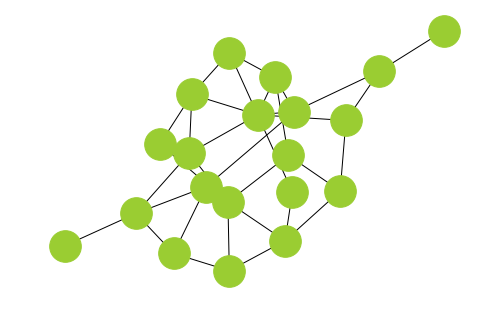

In [4]:
N = 20
P = 0.15
ER_graph = create_ER_graph(N, P, seed)

nx.draw(ER_graph, pos=nx.spring_layout(ER_graph), with_labels=False, font_size=15,
        node_color='yellowgreen', node_size=1000)


## 3 Scale-Free Graph

### 3.1 Overview

A scale free graph is a graph with a degree definition that follows a power law. The essentially means that there will likely be a large number of nodes with a small number of connections, and the **probability** of a node having a **large** number of connections is inversely proportional to the number of connections.

The Barabasi-Albert (BA) model *G(n,m)* is used to generate scale free networks through the implementation of preferential attachment. A BA graph will have n nodes, with each node having m edges. The graph initially has a small number of nodes, and new nodes are added over time. The probably of a new node being connected to an existing node is proportional to the number of connections the existing node already has. This essentially means that the nodes with the most connections are more likely to get even more connections, and causes a 'rich getting richer' effect.

This model is more relevant in the real world as humans almost always exhibit preferential attachment. If we take the example of social media accounts, there will be millions of accounts with a small number of followers, and a small number of celebrities with millions of followers. A new account will be more likely to follow the celebrities, and thus we have an example of preferential attachment.

### 3.2 Implementation

The below function creates a Barabasi-Albert Graph using the Networkx barabasi_albert_graph function

In [5]:
def create_SF_graph(N, M, seed):
    '''
        N : Number of nodes
        M : Number of edges to attach from a new node to an existing node
        seed : For reproduction of results
    '''
    return nx.barabasi_albert_graph(N, M, seed)

### 3.3 Visualisation

Create a Scale Free Graph with N = 20 and M = 3

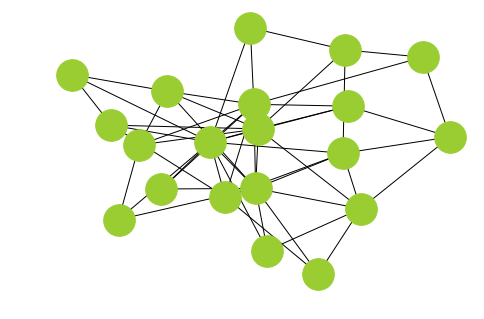

In [6]:
N = 20
M = 3
SF_graph = create_SF_graph(N, M, seed)

nx.draw(SF_graph, pos=nx.spring_layout(SF_graph), with_labels=False, font_size=15,
        node_color='yellowgreen', node_size=1000)

## 4. Experiment 1

## 4.1 Overview

- Need to include the below in some way shape or form :
- We will see the effect of an attack/failure on two different types of networks
- To measure this "effect" we will be graphing the diameter of the graph vs the fraction of nodes removed
- What do we expect overselves to occur? - some sort of reasoning or logic
- What does the paper expect to happen? - quick summary of what paper found

## 4.2 Common Functionality

Define a range which represents the fraction of nodes to be removed at each iteration

In [7]:
remove_range = list(np.arange(0.005, 0.055, 0.005))

The below function determines the diameter (as defined by this paper) of a given graph - e.g. finds the average shortest path in the graph

In [8]:
def get_diameter(G):
    '''
        G : Graph
    '''
    return nx.average_shortest_path_length(G)

## 4.3 Failure

The following function will delete a random fraction/portion of nodes from the graph. These nodes are retrieved from a list which is randomly sorted. A local copy of the graph is made and returned so as to ensure the graph is not mutated.

In [9]:
def delete_random_nodes(G, f, L):
    '''
        G : Graph
        f : The fraction of nodes to be removed
        L : List of random nodes
    '''
    G_local = G.copy()
    
    # calculate the amount of nodes to be removed (as opposed to the fraction of nodes to be removed)
    N = len(G_local.nodes)
    delete_amount = int(N * f)
    
    count = 1

    # for each node in L - remove a node from the local graph until you reach the relevant threshold
    for node in L:
        G_local.remove_node(node)

        if count >= delete_amount:
            break
        else:
            count = count + 1
    
    return G_local

The following function is the driver for the "generate failure" functionality.

In [10]:
def generate_failure(G, remove_range):
    '''
        G: graph
        remove_range : a list of fractions which denote the number of nodes to be removed at each iteration
    '''
    diameters = []

    for f in remove_range:
        
        # randomly shuffle the nodes to simulate a "random" attack
        G_random_nodes = list(G.nodes())
        random.shuffle(G_random_nodes)

        # retrieve the modifed graph where the relevant random nodes have been removed
        deleted_graph = delete_random_nodes(G, f, G_random_nodes)
        
        recalculated_diameter = get_diameter(deleted_graph)
        
        # add this diameter to the returned list
        diameters.append(recalculated_diameter)

    return diameters

## 4.4 Attack

The following function will delete the most connected nodes within a graph. These highly connected nodes are deleted in order and are retrieved from a list passed into the function. Again, a local copy of the graph is made and returned so as to ensure the graph is not mutated.

In [11]:
def delete_connected_nodes(G, f, L):  
    '''
        G : Graph
        f : The fraction of nodes to be removed
        L : List of highly connected nodes
    '''
    G_local = G.copy()

    N = len(G_local.nodes)
    delete_amount = int(N * f)
    count = 1

    # each element in L is a tuple of (node, links)
    for (node, _) in L:
        G_local.remove_node(node)
            
        # keep removing nodes until we reach the amount specified by 'f'
        if count >= delete_amount:
            break
        else:
            count = count + 1

    return G_local

The below function will return a list of the highest connected nodes within a graph.

In [12]:
def get_most_connected_nodes(G):
    '''
        G : Graph 
    '''
    
    # G.degree returns (node, degree)
    degrees = list(G.degree)
    
    # order the nodes in descending order based on degree
    degrees.sort(key=lambda tup: tup[1], reverse=True)
    
    return degrees

The following function is the driver for the "generate attack" functionality.

In [13]:
def generate_attack(G, remove_range):
    '''
        G : Graph
        remove_range : List of fractions which highlight the portion of nodes to be removed at each iteration
    '''
    
    # retrieve the most connected nodes of the relevant graph
    connected_nodes_list = get_most_connected_nodes(G) 
    
    diameters = []

    for f in remove_range:
        
        # delete the relevant amount of nodes
        modified_graph = delete_connected_nodes(G, f, connected_nodes_list)
        
        recalculated_diameter = get_diameter(modified_graph)
        diameters.append(recalculated_diameter)

    return diameters

## 4.5 Run Experiment

We should first re-define the ER and SF graph as seen below.

In [14]:
N = 300
M = 7
P = 0.1

In [15]:
ER_graph = create_ER_graph(N, P, seed)
SF_graph = create_SF_graph(N, M, seed)

Define a simple function which will plot the relevant data for us.

In [16]:
def generate_experiment_1_graph(x, graph_data):    
    
    '''
        x : X-axis values
        graph_data : List of lists which contains all the data from the above experiments
    '''
    
    plt.plot(x, graph_data[0], marker='^', label="ER Failure", color="b")
    plt.plot(x, graph_data[1], marker='D', label="ER Attack", color="r")
    plt.plot(x, graph_data[2], marker='s', label="SF Failure",color="b")
    plt.plot(x, graph_data[3], marker='o', label="SF Attack",color="r")   
    
    plt.xlabel('Fraction f of nodes removed')
    plt.ylabel('Diameter d')
    plt.legend(loc='upper right')
    plt.title("Failure & Attack On SF & ER Graph")
    plt.show()

Remove random nodes from an ER Graph - simulating a graph failure.

In [17]:
ER_failure_diameters = generate_failure(ER_graph, remove_range)

Remove the most connected nodes from an ER Graph - simulating an attack on a graph

In [18]:
ER_attack_diameters = generate_attack(ER_graph, remove_range)

Remove random nodes from an SF Graph - simulating a graph failure.

In [19]:
SF_failure_diameters = generate_failure(SF_graph, remove_range)

Remove the most connected nodes from an SF Graph - simulating an attack on a graph

In [20]:
SF_attack_diameters = generate_attack(SF_graph, remove_range)

Graph the results from the above experiments.

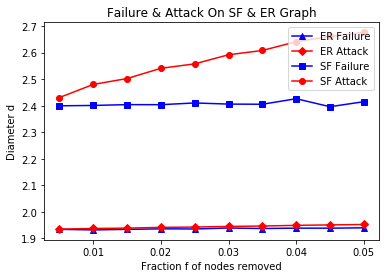

In [21]:
graph_data = [ER_failure_diameters, ER_attack_diameters, SF_failure_diameters, SF_attack_diameters]
generate_experiment_1_graph(remove_range, graph_data)

## 4.6 Discussion Of Generated Results

Need to answer the following questions :
    - Differences between what we got and what the papers got
    - Why the results differ
    - What could be improved 

## 5. Experiment 1 - Facebook

## 5.1 Overview

- Need to explain :
- Why we chose facebook (internet and WWW were too big?)
- High density of facebook graph means we won't see the same results
- Results we are expecting

## 5.2 Common Functionality

The following two functions have been taken from 'Think Complexity' by Allen B. Downey. This "sampling" method is used instead since an extensive search of every single path will take too long. The below two functions enable us to search the graph space quickly and determine a rough value for the path length.

In [22]:
def sample_path_lengths(G, trials=1000):
    '''
        G : Graph
        trails : Number of trials this sampling is going accumulate, default 1000
    '''
    nodes = list(G)

    pairs = np.random.choice(nodes, (trials, 2)) 

    lengths = [nx.shortest_path_length(G, *pair) 
               for pair in pairs]
    
    return lengths

In [23]:
def estimate_path_length(G, trials=1000):
    '''
        G : Graph
        trails : Number of trials this sampling is going accumulate, default 1000
    '''
    return np.mean(sample_path_lengths(G, trials))

The following function is required due to the properties of the Facebook dataset. Removing a small number of nodes appears to split the Facebook data into a number of clusters. The following function returns the maximum diameter out of these clusters.

In [24]:
def max_subgraph_diameter(G):
    '''
        G :Graph
    '''
    
    # get a list of all the subgraphs
    subgraphs = nx.connected_component_subgraphs(G)
    
    subgraph_diameters = []
    
    for subgraph in subgraphs:
        
        # estimate the length of the relevant cluster
        L = estimate_path_length(subgraph)
        
        # don't include those clusters whose length is 0
        if L != 0.0:
            subgraph_diameters.append(L)

    L = max(subgraph_diameters)
    
    return L

## 5.3 Failure

A similar function to the one defined in Section 4. The difference lies in how the diameter is retrieved. Removing a small number of nodes seems to change the properties of the graph from connected to not connected. As a result, and to accomodate this disconnection, the largest clusters' diameter is recorded as an alternative.

In [25]:
def facebook_generate_failure(G, range):
    '''
        G : Graph
        range : fraction which represents the portion of nodes to be removed
    '''
    
    diameters = []

    for f in range:
        
        # randomise the list of nodes within the graph
        G_random_nodes = list(G.nodes())
        random.shuffle(G_random_nodes)

        G_modified = delete_random_nodes(G, f, G_random_nodes)
        
        # measure the diameter of the largest cluster
        diameter = max_subgraph_diameter(G_modified)
        diameters.append(diameter)
    
    return diameters

## 5.4 Attack

Again, this function is very similar to it's counterpart in Section 4 - the only difference is the way in which 'diameter' is measured, as explained above.

In [26]:
def facebook_generate_attack(G, range):
    '''
        G : Graph
        range : fraction which represents the portion of nodes to be removed
    '''
    diameters = []

    for f in range:
        G_connected_nodes = get_most_connected_nodes(G)
        G_modified = delete_connected_nodes(G, f, G_connected_nodes)
        diameter = max_subgraph_diameter(G_modified)
        diameters.append(diameter)

    return diameters

## 5.5 Run Experiment

The following function will be used to plot the values derived in this experiment.

In [27]:
def generate_facebook_graph(attack, failure, x):
    plt.plot(x, failure, marker='s', label="Facebook Failure", color="b")
    plt.plot(x, attack, marker='o', label="Facebook Attack", color="r")
    plt.xlabel('Fraction of nodes removed')
    plt.ylabel('Diameter d Of Largest Subgraph')
    plt.legend(loc='upper right')
    plt.title("Failure & Attack On Facebook Graph")
    plt.show()

The following function is also taken from 'Think Complexity' by Allen B. Downey. The below code just allows us to read in the Facebook dataset, provided by SNAP, and convert it into a networkX graph.

In [28]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

Read in the graph.

In [29]:
facebook = read_graph('facebook_combined.txt.gz')
remove_range = list(np.arange(0.00, 0.055, 0.005))

Run the attack and failure experiment on the Facebook data and store the results.

In [30]:
facebook_attack_diameters = facebook_generate_attack(facebook, remove_range)

In [31]:
facebook_failure_diameters = facebook_generate_failure(facebook, remove_range)

Graph the results.

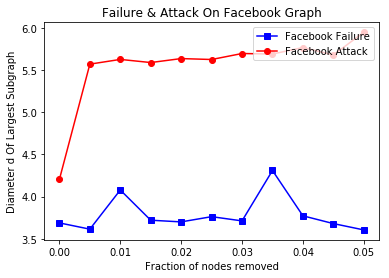

In [32]:
generate_facebook_graph(facebook_attack_diameters, facebook_failure_diameters, remove_range)

## 5.4 Discussion Of Generated Results

- Re-iterate the difference between the facebook graph and the internet graph 
- Any other observations... all about density of graph - change in these properties have led to different graphs being generated
- We also find the diameter of the largest cluster in the facebook graph..... does that make a difference?

# 6. Experiment 2

## 6.1 Overview

## 6.2 Common Functionality

The following function returns the length/size (e.g. number of nodes) of the largest cluster within a provided graph.

In [33]:
def get_largest_cluster_len(G):
    '''
        G : graph
    '''
    
    # sort the size of the subgraphs in descending order
    sub_graphs_sorted = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
    
    largest_cluster = sub_graphs_sorted[0]
    
    return len(largest_cluster)

The following function determines the average size of those clusters within a graph, excluding the largest subgraph.

In [34]:
def get_isolated_clusters_len(G):
    '''
        G : graph
    '''
    sub_graphs_sorted = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
    
    if len(sub_graphs_sorted) == 1:
        return 0

    # remove the largest cluster from the list of subgraphs
    largest_cluster = sub_graphs_sorted[0]
    sub_graphs_sorted.remove(largest_cluster)

    # generate a list of subgraph sizes
    subgraph_sizes = []
    for subgraph in sub_graphs_sorted:
        subgraph_size = len(subgraph)
        subgraph_sizes.append(subgraph_size)

    # return the average subgraph size
    return np.mean(subgraph_sizes)

The following function is the relevant graphing function which will be used later on.

In [35]:
def generate_experiment_2_graph(name, remove_range, Failure_big_S, Attack_big_S, Failure_small_s, Attack_small_s):
    plt.plot(remove_range, Failure_big_S, marker='^', linestyle = 'None', label="Failure S", color="b", markerfacecolor='none')
    plt.plot(remove_range, Attack_big_S, marker='D', linestyle = 'None', label="Attack S", color="r", markerfacecolor='none')
    plt.plot(remove_range, Failure_small_s, marker='^', linestyle = 'None', label="Failure <s>", color="b",)
    plt.plot(remove_range, Attack_small_s, marker='D', linestyle = 'None', label="Attack <s>", color="r")
    plt.xlabel('Fraction f of nodes removed')
    plt.ylabel('S')
    plt.legend(loc='upper right')
    plt.title(name)
    plt.show()

The following constants will also be used.

In [36]:
N = 1000 # Number of nodes

M = 2 # Number of edges to attach from a new node to an existing node

P = 0.002 # Probability that each node is connected

remove_range = list(np.arange(0.0, 1, 0.01))

## 6.3 Failure

For each iteration, the following function will remove random nodes from the graph provided and measure the largest cluster size. The fraction of this over the system size is recorded within a list which is returned when the function completes. 

In [37]:
def generate_failure_big_S(G, remove_range, system_size):
    '''
        G : Graph
        remove_range : List of fractions which represent the proportion of nodes to be removed
        system_size : Number of nodes within G
    '''
    S = []

    for f in remove_range:
        G_random_nodes = list(G.nodes())
        random.shuffle(G_random_nodes)
        modified_graph = delete_random_nodes(G, f, G_random_nodes)
        
        # get the size of the largest cluster
        size_of_lg_cluster = get_largest_cluster_len(modified_graph)
        # represent this as a fraction of the system size
        fraction_of_system = size_of_lg_cluster/system_size
        
        S.append(fraction_of_system)

    return S 

The following function has similar functionality to the above, but will instead record the average size of the clusters produced when nodes are randomly removed.

In [38]:
def generate_failure_small_s(G, remove_range):
    '''
        G : Graph
        remove_range : List of fractions which represent the proportion of nodes to be removed
    '''
    S = []
    G_random_nodes = list(G.nodes())
    random.shuffle(G_random_nodes)

    for f in remove_range:
        modified_graph = delete_random_nodes(G, f, G_random_nodes)
        
        # find the avg size of the clusters within the graph (excluding the largest cluster)
        avg_isolated_cluster = get_isolated_clusters_len(modified_graph)
        
        S.append(avg_isolated_cluster)
    
    return S

## 6.4 Attack

At each iteration the following function will remove a portion of the most connected nodes (in order) and measure the size of the largest cluster.

In [39]:
def generate_attack_big_S(G, remove_range, system_size):
    '''
        G : Graph
        remove_range : List of fractions which represent the proportion of nodes to be removed
        system_size : Number of nodes within G 
    '''
    connected_nodes_list = get_most_connected_nodes(G) 
    S = []

    for f in remove_range:
        # similar to above except we're deleting the most connected nodes - not random nodes
        modified_graph = delete_connected_nodes(G, f, connected_nodes_list)
    
        size_of_lg_cluster = get_largest_cluster_len(modified_graph)
        fraction_of_system = size_of_lg_cluster/system_size
        
        S.append(fraction_of_system)
    
    return S

Again, similar functionality to above but the average size of the clusters produced will be recorded instead of the size of the largest cluster.

In [40]:
def generate_attack_small_s(G, remove_range):
    connected_nodes_list = get_most_connected_nodes(G) 
    S = []

    for f in remove_range:
        modified_graph = delete_connected_nodes(G, f, connected_nodes_list)
        
        # get the average size of the clusters within the modifed graph (after excluding the largest cluster)
        avg_isolated_cluster = get_isolated_clusters_len(modified_graph)
        
        S.append(avg_isolated_cluster)
    
    return S

## 6.5 ER Graph - Run Experiment

Re-set ER_graph and store the size of the system.

In [41]:
ER_graph = create_ER_graph(N, P, seed)

In [42]:
ER_system_size = len(ER_graph)

Run the four experiments, storing all data.

In [43]:
ER_Failure_big_S = generate_failure_big_S(ER_graph, remove_range, ER_system_size)

In [44]:
ER_Attack_big_S = generate_attack_big_S(ER_graph, remove_range, ER_system_size)

In [45]:
ER_Failure_small_s = generate_failure_small_s(ER_graph, remove_range)

In [46]:
ER_Attack_small_s = generate_attack_small_s(ER_graph, remove_range)

Graph the results of the experiment.

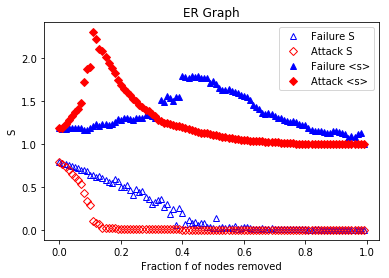

In [47]:
generate_experiment_2_graph("ER Graph", remove_range, ER_Failure_big_S, ER_Attack_big_S, ER_Failure_small_s, ER_Attack_small_s)

## 6.5 SF Graph - Run Experiment

Re-set SF_graph and store the size of the system.

In [48]:
SF_graph = create_SF_graph(N, M, seed)

In [49]:
SF_system_size = len(SF_graph)

Run the four experiments, storing all data.

In [50]:
SF_Failure_big_S = generate_failure_big_S(SF_graph, remove_range, SF_system_size)

In [51]:
SF_Attack_big_S = generate_attack_big_S(SF_graph, remove_range, SF_system_size)

In [52]:
SF_Failure_small_s = generate_failure_small_s(SF_graph, remove_range)

In [53]:
SF_Attack_small_s = generate_attack_small_s(SF_graph, remove_range)

Graph the results of the experiment.

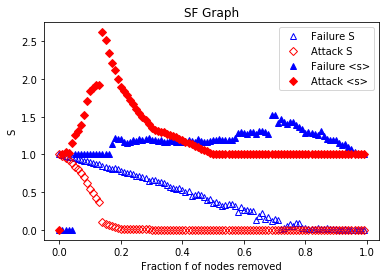

In [54]:
generate_experiment_2_graph("SF Graph", remove_range, SF_Failure_big_S, SF_Attack_big_S, SF_Failure_small_s, SF_Attack_small_s)

## 6.6 Facebook Graph - Run Experiment

Re-set the remove_range which differs to the range used previously. Save the size of the system.

In [55]:
remove_range = list(np.arange(0.0,0.5, 0.01))

In [56]:
facebook_system_size = len(facebook)

Run the four experiments, storing all data.

In [57]:
facebook_Failure_big_S = generate_failure_big_S(facebook, remove_range, facebook_system_size)

In [58]:
facebook_Attack_big_S = generate_attack_big_S(facebook, remove_range, facebook_system_size)

In [59]:
facebook_Failure_small_s = generate_failure_small_s(facebook, remove_range)

In [60]:
facebook_Attack_small_s = generate_attack_small_s(facebook, remove_range)

Graph the results of the experiment.

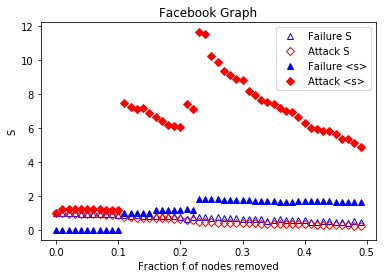

In [61]:
generate_experiment_2_graph("Facebook Graph", remove_range, facebook_Failure_big_S, facebook_Attack_big_S, facebook_Failure_small_s, facebook_Attack_small_s)

## 6.6 Discussion On Generated Results

# 7. Extension

## Building Robustness

As this paper has been all about how to test the robustness (how vulnerable the network is to random failure and attack), in the extension we are going to explore how to build a robust network.

## Hub and Spoke Network

The first network we are going to look at is a Hub and Spoke network which connects every node to a central node.

In [91]:
def create_hub_spoke_graph(N):
    '''
        N : Number of nodes
    '''
    return nx.star_graph(N)

Visulisation

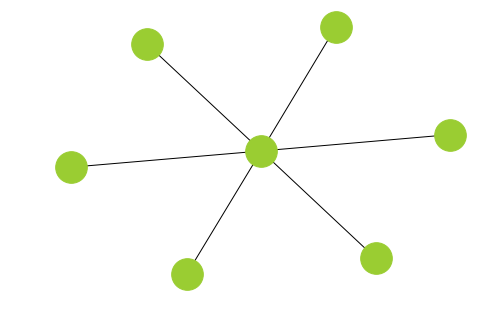

In [92]:

N = 6
hub_graph = create_hub_spoke_graph(N)
nx.draw(hub_graph, font_size=15, node_color='yellowgreen', node_size=1000)

(REWORD)
This network is robust to random failures as only the central node can break the network. Therefore, the probability that a random failure will fragment the network is 1/N, which is negligible for large N. However, this network is very vulnerable to attacks, as the removal of a single node breaks the network into isolated nodes.

We can increase the robustness of this graph by enhancing it's attack tolerance. We can do this by connecting it's peripheral nodes as shown below.

In [96]:
def create_connected_hub_spoke_graph(N):
    '''
        N : Number of nodes
    '''
    return nx.wheel_graph(N)

Visulisation

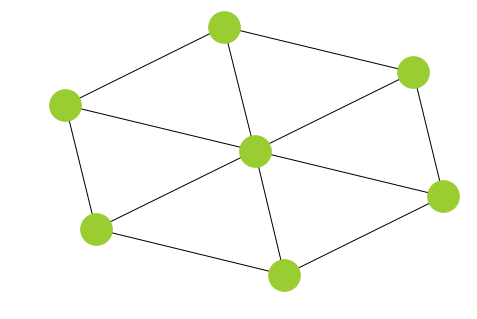

In [97]:
N = 7

connected_hub_graph = create_connected_hub_spoke_graph(N)
nx.draw(connected_hub_graph, font_size=15, node_color='yellowgreen', node_size=1000)

However this comes at a cost. By doing this we double the amount of links. Let us calculate the average degree for both graphs.

In [98]:
def find_average_degree(G):
    
    # G.degree returns (node, degree)
    degrees = list(G.degree)
    
    total = 0
    for node, degree in degrees:
        total += degree
        
    return (G.number_of_nodes(), total)

# Need to make this look better 
print(find_average_degree(hub_graph))
print(find_average_degree(connected_hub_graph))

(7, 12)
(7, 24)


If we define the cost to build a network to be proportional to its average degree <k>, the cost of the connected hub and spoke (24/7) is double the cost of the hub and spoke (12/7). This increases cost prompts us to refine our question: can we maximise the robustness of a network without changing the cost?

(LOTS OF EXPLANATION)

[2, 3, 4, 5, 6, 7, 8]
Current node = 2
Count neighbors = 1
Adding edge from:2 3
Current node = 3
Current node = 4
Count neighbors = 1
Adding edge from:4 5
Current node = 5
Current node = 6
Count neighbors = 0
Adding edge from:6 7
Count neighbors = 1
Adding edge from:6 8
Current node = 7
Count neighbors = 1
Adding edge from:7 8
Current node = 8


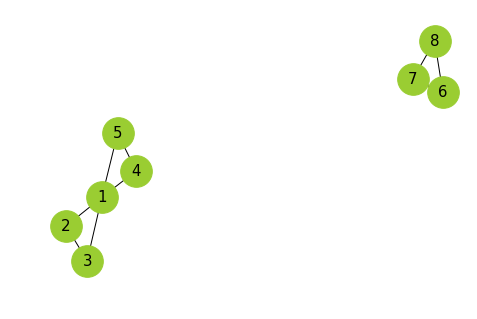

In [138]:
def count_neighbors(G, node):
    return (len(list((G.neighbors(node)))))

def create_centralised_graph(N, kmin):
    
    kmax = np.round(np.power(N, 2/3))
    kmax = 4
    
    G = nx.Graph()
    
    # Range goes to N-1 so we want to have N nodes hence N+1
    G.add_nodes_from(range(1,N+1))
    
    # Connect central node to nearest kmax nodes
    for i in range(kmax+1):
        G.add_edge(1, i+1)
    
    # Loop through every node and connect to kmin nearest nodes
    # But checking every neighbour doesn't have more than kmin edges
    
    nodeList = list(G.nodes())
    nodeList.pop(0)
    print (nodeList)
    
    for i in nodeList:
        
        # Skip the central node
        node = i
        print ("Current node = " + str(node))
        
        while count_neighbors(G, node) < kmin:
            print ("Count neighbors = " + str(count_neighbors(G, node)))
            
            
            next_node = i+1
            
            if G.has_edge(node, next_node):
                next_node += 1
            
            while count_neighbors(G, next_node) >= kmin:
                next_node += 1
            
            G.add_edge(node, next_node)
            print ("Adding edge from:" + str(node) + " " + str(next_node))
    
    
    return G
    
centralised_graph = create_centralised_graph(8, 2)    
nx.draw(centralised_graph, font_size=15, with_labels=True, node_color='yellowgreen', node_size=1000)
    

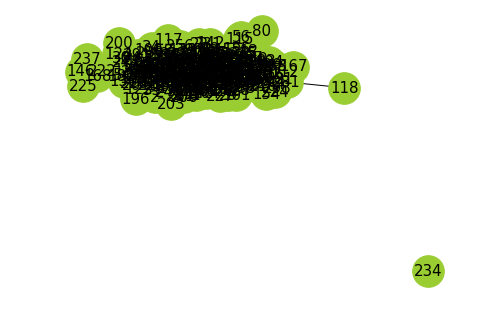

In [160]:
def create_centralised_graph(N, k, p, kmax, seed):
    #G = nx.watts_strogatz_graph(N, k, p, seed)
    G = nx.erdos_renyi_graph(N, 5/300 ,seed)
    
    node_list = list(G.nodes)
    node_list.pop(0)
    random_subset = random.sample(node_list, kmax)
    
    for i in random_subset:
        G.add_edge(0, i)
    
    return G


centralised_graph = create_centralised_graph(300, 5, 1, 150, seed)    
nx.draw(centralised_graph, font_size=15, with_labels=True, node_color='yellowgreen', node_size=1000)

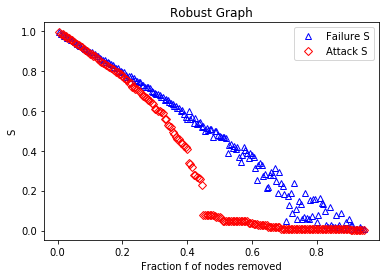

In [161]:
def generate_experiment_3_graph(name, remove_range, Failure_big_S, Attack_big_S):
    plt.plot(remove_range, Failure_big_S, marker='^', linestyle = 'None', label="Failure S", color="b", markerfacecolor='none')
    plt.plot(remove_range, Attack_big_S, marker='D', linestyle = 'None', label="Attack S", color="r", markerfacecolor='none')
    plt.xlabel('Fraction f of nodes removed')
    plt.ylabel('S')
    plt.legend(loc='upper right')
    plt.title(name)
    plt.show()

remove_range = list(np.arange(0.005, 0.95, 0.005))    

ER_Failure_big_S = generate_failure_big_S(centralised_graph, remove_range, 300)
ER_Attack_big_S = generate_attack_big_S(centralised_graph, remove_range, 300)



generate_experiment_3_graph("Robust Graph", remove_range, ER_Failure_big_S, ER_Attack_big_S)